# Transformation

width  144 height  144


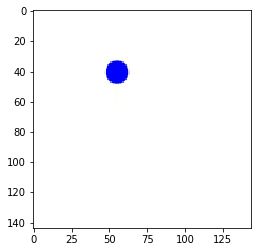

In [1]:
%matplotlib inline
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.transforms import *

np.random.seed(37)

image = Image.open('./shapes/train/circle/0001.jpg', 'r')
print('width ', image.width, 'height ', image.height)

plt.imshow(image)

## PIL transforms

### Crop

Text(0.5, 1.0, 'Zoom Out')

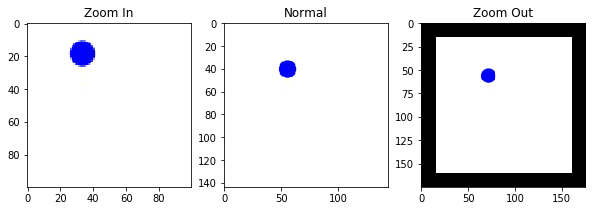

In [2]:
t1 = CenterCrop(100)
t2 = CenterCrop(144)
t3 = CenterCrop(175)

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(t1(image))
ax[1].imshow(t2(image))
ax[2].imshow(t3(image))

ax[0].set_title('Zoom In')
ax[1].set_title('Normal')
ax[2].set_title('Zoom Out')

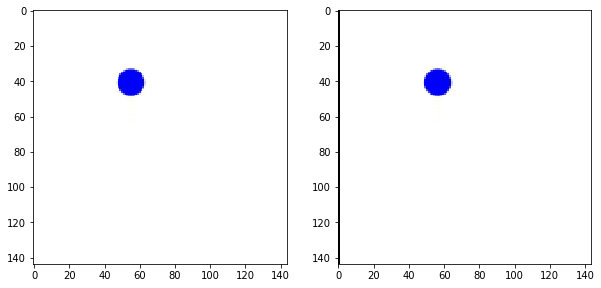

In [3]:
t1 = RandomCrop(size=(144, 144), padding=1)
t2 = RandomCrop(size=(144, 144), padding=5)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(t1(image))
ax[1].imshow(t2(image))

### ColorJitter

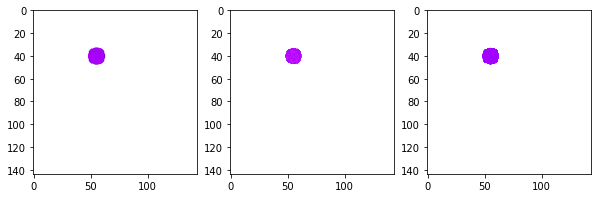

In [4]:
t1 = ColorJitter(brightness=10, contrast=0, saturation=0, hue=0.5)
t2 = ColorJitter(brightness=10, contrast=0, saturation=0.1, hue=0.5)
t3 = ColorJitter(brightness=10, contrast=0.5, saturation=0.1, hue=0.5)

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(t1(image))
ax[1].imshow(t2(image))
ax[2].imshow(t3(image))

### Grayscale

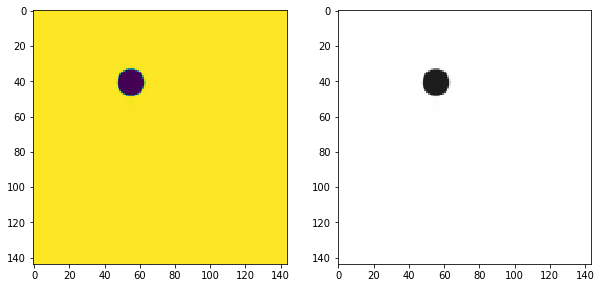

In [5]:
t1 = Grayscale(num_output_channels=1)
t2 = Grayscale(num_output_channels=3)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(t1(image))
ax[1].imshow(t2(image))

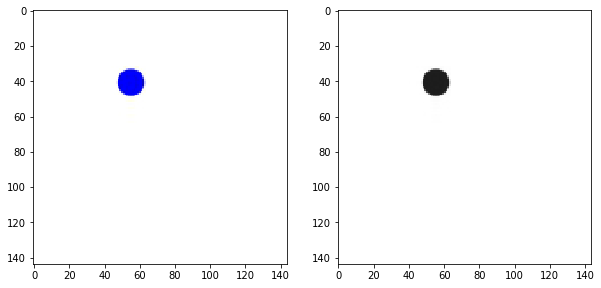

In [6]:
t1 = RandomGrayscale(p=0.1)
t2 = RandomGrayscale(p=0.6)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(t1(image))
ax[1].imshow(t2(image))

### Pad

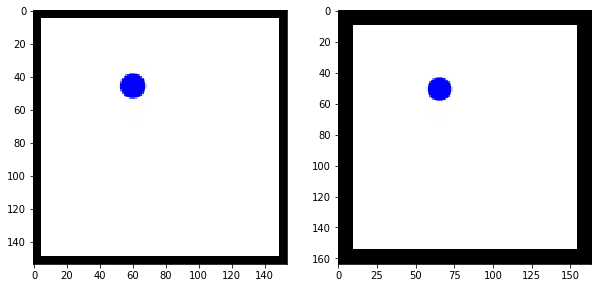

In [7]:
t1 = Pad(5)
t2 = Pad(10)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(t1(image))
ax[1].imshow(t2(image))

### RandomAffine

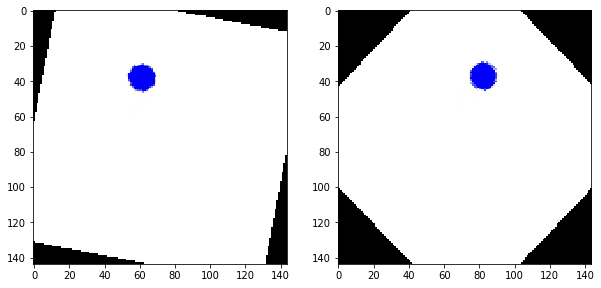

In [8]:
t1 = RandomAffine(degrees=(0, 30))
t2 = RandomAffine(degrees=(30, 50), shear=3)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(t1(image))
ax[1].imshow(t2(image))

### RandomApply

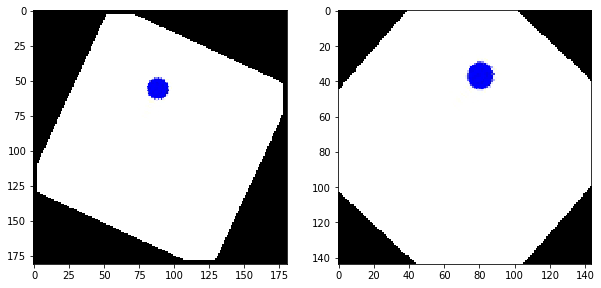

In [9]:
t1 = RandomApply([CenterCrop(175), 
                  RandomAffine(degrees=(0, 30)), 
                  Pad(3)], p=0.5)
t1 = RandomApply([CenterCrop(175), 
                  RandomAffine(degrees=(0, 30)), 
                  Pad(3)], p=0.5)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(t1(image))
ax[1].imshow(t2(image))

### RandomChoice

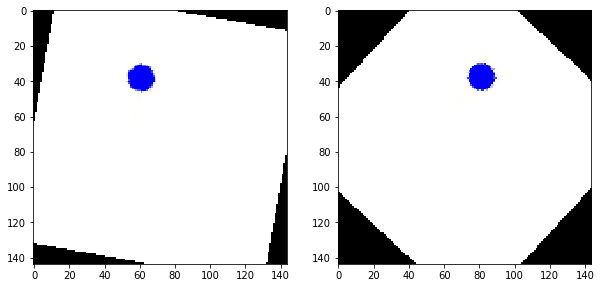

In [10]:
t1 = RandomChoice([CenterCrop(175), 
                  RandomAffine(degrees=(0, 30)), 
                  Pad(3)])
t1 = RandomChoice([CenterCrop(175), 
                  RandomAffine(degrees=(0, 30)), 
                  Pad(3)])

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(t1(image))
ax[1].imshow(t2(image))

### RandomFlip

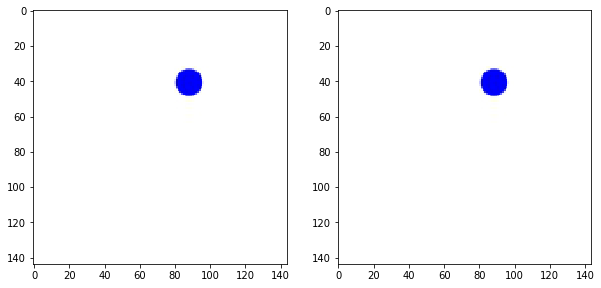

In [11]:
t1 = RandomHorizontalFlip(p=0.99)
t2 = RandomHorizontalFlip(p=0.99)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(t1(image))
ax[1].imshow(t2(image))

### RandomOrder

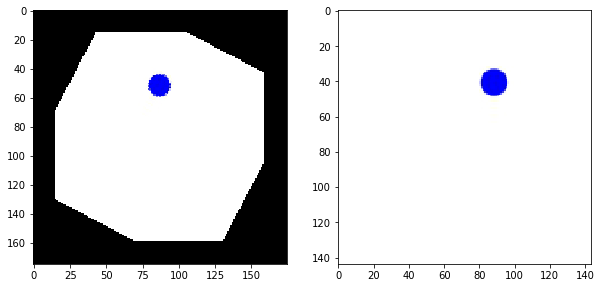

In [12]:
t1 = RandomOrder([CenterCrop(175), 
                  RandomAffine(degrees=(0, 30)), 
                  Pad(3)])
t1 = RandomOrder([CenterCrop(175), 
                  RandomAffine(degrees=(0, 30)), 
                  Pad(3)])

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(t1(image))
ax[1].imshow(t2(image))

### RandomPerspective

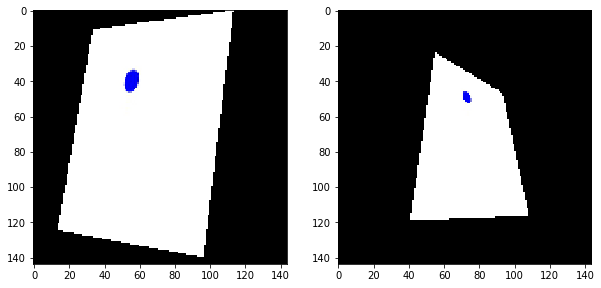

In [13]:
t1 = RandomPerspective(distortion_scale=0.8, p=0.99)
t2 = RandomPerspective(distortion_scale=0.8, p=0.99)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(t1(image))
ax[1].imshow(t2(image))

### RandomRotation

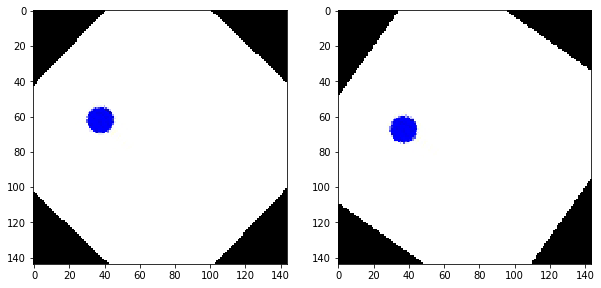

In [14]:
t1 = RandomRotation(degrees=(45, 90))
t2 = RandomRotation(degrees=(45, 90))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(t1(image))
ax[1].imshow(t2(image))

### Resize

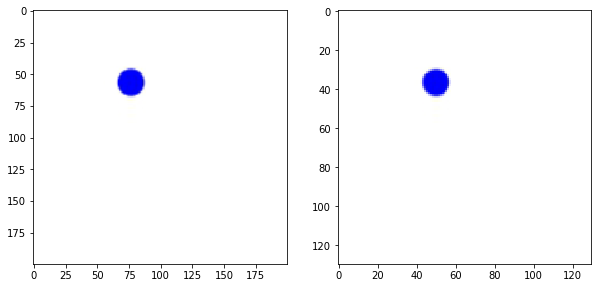

In [15]:
t1 = Resize(size=(200, 200))
t2 = Resize(size=(130, 130))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(t1(image))
ax[1].imshow(t2(image))

## Tensor transforms

In [16]:
import torch

data = ToTensor()(image)
c, h, w = data.shape[0], data.shape[1], data.shape[2]

### Normalize

In [17]:
t = Normalize(mean=[0.5, 0.5, 0.5], std=[1., 1., 1.])
o = t(data)
o.shape

torch.Size([3, 144, 144])

### RandomErasing

In [18]:
t = RandomErasing(p=0.5)
o = t(data)
o.shape

torch.Size([3, 144, 144])

## Conversion transforms

### PIL image

Text(0.5, 1.0, 'Erasing')

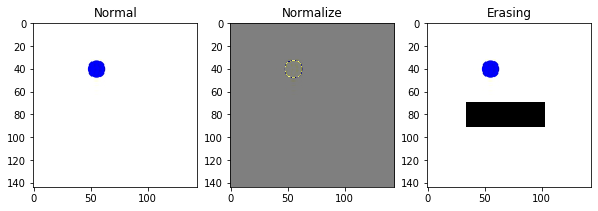

In [19]:
t1 = transforms.Compose([
    ToTensor(),
    ToPILImage()
])
t2 = transforms.Compose([
    ToTensor(),
    Normalize(mean=[0.5, 0.5, 0.5], std=[1., 1., 1.]),
    ToPILImage()
])
t3 = transforms.Compose([
    ToTensor(),
    RandomErasing(p=0.9),
    ToPILImage()
])

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(t1(image))
ax[1].imshow(t2(image))
ax[2].imshow(t3(image))

ax[0].set_title('Normal')
ax[1].set_title('Normalize')
ax[2].set_title('Erasing')